In [1]:
import yfinance as yf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

C:\Users\aab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
crude_oil_ticker = "CL=F"
crude_oil = yf.Ticker(crude_oil_ticker)
hist = crude_oil.history()

In [3]:
data = yf.download(crude_oil_ticker, start = '2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
euro = yf.download('EURUSD=X', start = '2021-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
rur = yf.download('USDRUB=X', start = '2021-01-01')

[*********************100%***********************]  1 of 1 completed


# Задание 1.

* Вы - менеджер по продажам в нефтехимической компании. Вы ведете несколько ключевых клиентов, которые закупают продукты вашей компании. Ваша компания запускает новый продукт - "Синтетический каучук" (СК), который по своим свойствам похож на тот, что уже есть на рынке. Ваши клиенты предпочитают формульный подход к ценообразованию. Вам нужно предложить клиентам формулу расчета цены на СК. В зависимости от объемов, которые покупают клиенты, им может быть предложена скидка.


* СК производиться из нефти. Один из известных способов производства предполагает, что из 10 баррелей нефти сделают одну тонну СК, а затраты на производство в районе 400 евро.

In [6]:
# Затраты на производство
PRODUCTION_COST = 400 # (EUR)

# Расходы на логистику
EU_LOGISTIC_COST_EUR = 30 # в Европу в евро
CN_LOGISTIC_COST_USD = 130 # в Китай в долларах

# * Справочная информация по клиентам(объемы, локации, комментарии) 
customers = {
    'Сonty':{
        'location':'EU',
        'volumes':200,
        'comment':'moving_average'
    },
    
    'Triangle':{
        'location':'CN',
        'volumes': 30,
        'comment': 'monthly'
    },
    'Stone':{
        'location':'EU',
        'volumes': 150,
        'comment': 'moving_average'
    },
    'Ant':{
        'location':'EU',
        'volumes': 70,
        'comment': 'monthly'
    }
}
# Скидки
discounts = {'99': 0.01, # до 100 тонн 1%
             '299': 0.05, #  до 300 тонн 5%
             '300': 0.1}   # больше 300 тонн 10%


In [7]:
# функция расчета скидки по словарю скидок
def get_discount(amount):
    '''
    функция возвращает размер скидки по переданному значению объема закупки
    функция использует глобальный словарь discounts
    если на вход дано отрицательное значение, функция возвращает нулевую скидку
    ВАЖНО: словарь скидок должен быть упорядочен по возрастанию объемов закупок
    '''
    if amount < 0:
        return 0
    for k, v in discounts.items():
        if amount <= int(k):
            return v
    return v   

### Что нужно сделать?

1. Определить базовую формулу цены на заводе. То есть как бы выглядела цена на исторических данных. 
* Важно, чтобы цена покрывала расходы на производство и при этом была в рынке, то есть на уровне натурального каучука или с небольшим дисконтом, котировки на который можно взять с сайта http://www3.lgm.gov.my/mre/MonthlyPrices.aspx (в центах за килограм). Можно перевести в доллары за тонну.
2. Отобразить на графике.
3. Сделать расчет возможной цены по формуле для каждого из клиентов на условиях DDP (цена с доставкой). Записать все в один эксель файл, на разных листах. Каждый лист - название клиента.
4. Предложить формулу цены каждому из клиентов на условиях DDP (цена с доставкой).
- Создать директорию «для клиентов» и в ней сложить  файлы с расчетами.
- Каждый клиент - отдельный файл (любой из docx, xlsx, pptx, pdf)  с именем клиента… 



In [8]:
# Извлекаем данные о котировках натурального каучука
import requests
import itertools

year = ['2021', '2022', '2023']
month = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

comb = list(itertools.product(year, month))

cf = pd.DataFrame()
for i in comb:
    print(f'Обрабатывается период: {i[1]} {i[0]}')
    url = f'https://www.lgm.gov.my/webv2api/api/rubberprice/month={int(i[1])}&year={int(i[0])}'
    res = requests.get(url)      
    rj = res.json()      
    if len(rj) == 0:
          break
    temp = pd.json_normalize(rj)
    cf = pd.concat([cf, temp])      

Обрабатывается период: 01 2021
Обрабатывается период: 02 2021
Обрабатывается период: 03 2021
Обрабатывается период: 04 2021
Обрабатывается период: 05 2021
Обрабатывается период: 06 2021
Обрабатывается период: 07 2021
Обрабатывается период: 08 2021
Обрабатывается период: 09 2021
Обрабатывается период: 10 2021
Обрабатывается период: 11 2021
Обрабатывается период: 12 2021
Обрабатывается период: 01 2022
Обрабатывается период: 02 2022
Обрабатывается период: 03 2022
Обрабатывается период: 04 2022
Обрабатывается период: 05 2022
Обрабатывается период: 06 2022
Обрабатывается период: 07 2022
Обрабатывается период: 08 2022
Обрабатывается период: 09 2022
Обрабатывается период: 10 2022
Обрабатывается период: 11 2022
Обрабатывается период: 12 2022
Обрабатывается период: 01 2023
Обрабатывается период: 02 2023
Обрабатывается период: 03 2023
Обрабатывается период: 04 2023


In [9]:
# преобразования колонок
cf.rename(columns = {'date': 'Date'}, inplace = True)
cf['Date'] = pd.to_datetime(cf['Date'].str.strip(), format = '%Y-%m-%d')
cf['us'] = pd.to_numeric(cf['us'], downcast = 'float')
cf.set_index('Date', inplace = True)

In [10]:
# агрегация цен на разные сорта каучука
cf2 = pd.concat([cf[cf['grade'] == 'SMR CV'].resample('M').mean()['us'], \
                 cf[cf['grade'] == 'SMR L'].resample('M').mean()['us'], \
                 cf[cf['grade'] == 'SMR 5'].resample('M').mean()['us'], \
                 cf[cf['grade'] == 'SMR GP'].resample('M').mean()['us'], \
                 cf[cf['grade'] == 'SMR 10'].resample('M').mean()['us'], \
                 cf[cf['grade'] == 'SMR 20'].resample('M').mean()['us']], axis = 1)

cf2.columns = ['SMR CV', 'SMR L', 'SMR 5', 'SMR GP', 'SMR 10', 'SMR 20']

In [11]:
cf2 *= 10 # перевод центов за кг в доллары за тонну
cf2 = cf2.round(0)
# добавляем колонки с максимальной и минимальной ценой
cf2['min_value'] = cf2.min(axis = 1)
cf2['max_value'] = cf2.max(axis = 1)
cf2['avg_value'] = cf2.mean(axis = 1)

In [13]:
# Базовая формула цены на заводе
# Сделаем датафрейм с ценами (нефть, курс евро к доллару, курс рубля к доллару)
df = pd.concat([data.resample('M').mean()['Close'], euro.resample('M').mean()['Close'], rur.resample('M').mean()['Close']], axis = 1)
df.columns = ['Oil', 'Eurusd', 'Usdrur']

# добавим цену производства тонны СК 
# базовая цена в евро
df['Basis'] = round(df['Oil'] * 10 / df['Eurusd'] + PRODUCTION_COST, 2)
# базовая цена в долларах
df['Basis_USD'] = round(df['Basis'] * df['Eurusd'])

In [15]:
# соединение таблиц 
df2 = pd.merge(df, cf2, left_index = True, right_index = True)

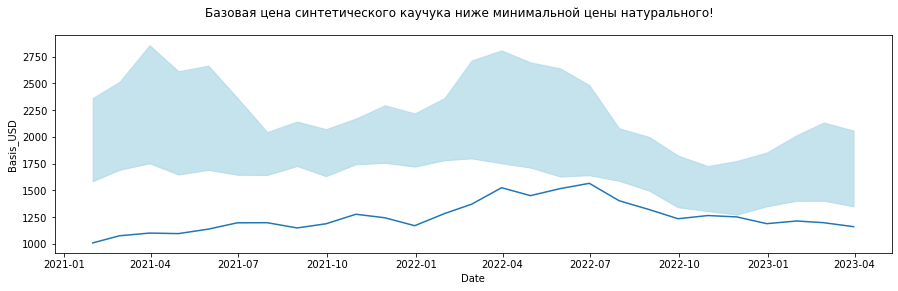

In [18]:
# график базовой цены на заводе
# цена нашего каучука ниже стоимости натурального
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (15, 4))

a = sns.lineplot(x = df2.index, y = df2['Basis_USD'])
b = sns.lineplot(x = df2.index, y = df2['min_value'], color = 'lightblue', alpha = .1)
c = sns.lineplot(x = df2.index, y = df2['max_value'], color = 'lightblue', alpha = .1)

line = c.get_lines()

fig.suptitle('Базовая цена синтетического каучука ниже минимальной цены натурального!')

plt.fill_between(line[0].get_xdata(), line[1].get_ydata(), line[2].get_ydata(), color = 'lightblue', alpha = .7)
plt.show()

In [19]:
# добавим в датафрейм расчет цены для каждого клиента
# для клиентов Европы цены в евро, для клиентов Китая цены в долларах

for i in customers.keys():
    if customers[i]['location'] == 'EU':
        df[i] = customers[i]['volumes'] * EU_LOGISTIC_COST_EUR * df['Basis'] * get_discount(customers[i]['volumes'])
    elif customers[i]['location'] == 'CN':
        df[i] = customers[i]['volumes'] * CN_LOGISTIC_COST_USD * df['Basis'] * df['Eurusd'] * get_discount(customers[i]['volumes'])
    else:
        print(f' Внимание: неизвестная локация!')
    df[i] = df[i].astype(int)    
        

In [20]:
df.head(3)

,Oil,Eurusd,Usdrur,Basis,Basis_USD,Сonty,Triangle,Stone,Ant
Date,,,,,,,,,
2021-01-31,52.102106,1.217785,74.351806,827.84,1008.0,248352,39317,186264,17384
2021-02-28,59.061053,1.209898,74.427065,888.15,1075.0,266445,41908,199833,18651
2021-03-31,62.357391,1.191474,74.481218,923.36,1100.0,277008,42906,207756,19390


In [21]:
# записываем расчетные цены в один файл и для каждого клиента - в отдельный файл
import os
clients_path = 'for_clients'
os.makedirs(clients_path, exist_ok = True)


xlfilepath = 'offer_prices.xlsx'
with pd.ExcelWriter(xlfilepath, engine = 'xlsxwriter') as writer:
    for client_name, client_info in customers.items():
        client_df = df[['Basis', client_name]].copy()

        if client_info.get('location') == 'EU':
            client_df['logistics per tonne'] = EU_LOGISTIC_COST_EUR
        elif client_info.get('location') == 'CN':
            client_df['logistics per tonne'] = CN_LOGISTIC_COST_USD
    
        if client_info.get('volumes'):
            client_df['volumes'] = client_info.get('volumes')

        client_df['discount'] = client_df['volumes'].apply(get_discount)
        client_df.rename(columns = {client_name: 'Total price'}, inplace = True)
        
        client_df['Total price'].plot(color = 'red', linestyle = 'dashed')
        plt.title(f'Client {client_name} total price')
        if client_info.get('location') == 'EU':
            plt.ylabel('EUR')
        else:
            plt.ylabel('USD')
        plt.tight_layout()
        plt.savefig(f'{client_name}_ck_price.png')
        plt.close()

        client_df = client_df.round(2)
        client_df = client_df.reset_index()
        client_df.Date = client_df.Date.dt.strftime('%B %Y')

        max_row, max_col = client_df.shape
        client_df.to_excel(writer, sheet_name = client_name, startrow = 1, header = False, index = False)
        workbook = writer.book
        worksheet = writer.sheets[client_name]
        column_settings = [{'header': column} for column in client_df.columns]
        worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
        worksheet.insert_image(max_row + 3, 1, f'{client_name}_ck_price.png')
        
        # запись отдельного файла для каждого клиента

        file_to_open = os.path.join(clients_path, client_name + '.xlsx')
        with pd.ExcelWriter(file_to_open, engine = 'xlsxwriter') as writer_one:
            client_df.to_excel(writer_one, sheet_name = client_name, startrow = 1, header = False, index = False)
            workbook = writer_one.book
            worksheet = writer_one.sheets[client_name]
            column_settings = [{'header': column} for column in client_df.columns]
            worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
            worksheet.insert_image(max_row + 3, 1, f'{client_name}_ck_price.png')
            


# Задание 2

Клиенты согласились на ваше предложение. 
Вам нужно сделать написать скрипт, с помощью которого можно автоматом рассчитывать цены для всех клиентов одновременно. 
Важный момент: данные для расчета скрипт должен подтягивать сам.

In [21]:
# См. файл HT3_SyntheticRubber.py

# Я вставил код по созданию отдельных файлов Экселя в уже существующий код в предыдущей ячейке. Это позволило не повторять код. 


# Задание 3

К вам пришел новый клиент из России. Который использует продукт А и готов регулярно закупать СК для того, чтобы не быть привязанным к одному поставщику. Клиент готов забирать СК с завода самостоятельно.
На основе тех данных, которые уже есть предложите цену новому клиенту в рублях. 



In [22]:
# расчет цены самовывоза с завода
df['Russia'] = df['Basis'] * df['Eurusd'] * df['Usdrur']
df['Russia'] = df['Russia'].astype(int) 


In [23]:
# создание файла для клиента
xlfilepath = 'offer_Russia_prices.xlsx'
with pd.ExcelWriter(xlfilepath, engine = 'xlsxwriter') as writer:
    client_df = df[['Basis', 'Russia']].copy()
    client_df['logistics per tonne'] = 0
    client_df['volumes'] = 1
    client_df['discount'] = client_df['volumes'].apply(get_discount)
    client_df.rename(columns = {'Russia': 'Total price'}, inplace = True)
        
    client_df['Total price'].plot(color = 'red', linestyle = 'dashed')
    plt.title(f'Russia EXW price')
    plt.ylabel('RUR')
    plt.tight_layout()
    plt.savefig(f'Russia_ck_price.png')
    plt.close()

    client_df = client_df.round(2)
    client_df = client_df.reset_index()
    client_df.Date = client_df.Date.dt.strftime('%B %Y')

    max_row, max_col = client_df.shape
    client_df.to_excel(writer, sheet_name = 'Russia EXW', startrow = 1, header = False, index = False)
    workbook = writer.book
    worksheet = writer.sheets['Russia EXW']
    column_settings = [{'header': column} for column in client_df.columns]
    worksheet.add_table(0, 0, max_row, max_col - 1, {'columns': column_settings})
    worksheet.insert_image(max_row + 3, 1, f'Russia_ck_price.png')
